In [ ]:
# Name Dipika Sharma
# DSC 540 T302 Data Preparation
# Week 5 and 6

I am using the IRS site to get the average income of each county of California.
https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi


In [1]:
# Declaring all the libraries I want to use now.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the csv file.

dataset=pd.read_csv("2019_CA_IRS.csv")

In [3]:
# Reading the first five rows of my dataset.

dataset.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,0,2100740.0,914850.0,743250.0,395440.0,1925700.0,75480.0,...,39520.0,141384.0,418210.0,1875183.0,1633620.0,5232476.0,1603620.0,4711318.0,32340.0,463956.0
1,1,AL,35004,0,5330.0,2310.0,2060.0,840.0,4910.0,200.0,...,20.0,30.0,1120.0,2718.0,4120.0,11050.0,4060.0,10414.0,70.0,320.0
2,1,AL,35005,0,3280.0,1520.0,800.0,900.0,2980.0,120.0,...,0.0,0.0,490.0,1002.0,2730.0,8047.0,2720.0,7959.0,0.0,0.0
3,1,AL,35006,0,1230.0,490.0,570.0,160.0,1150.0,30.0,...,0.0,0.0,200.0,558.0,1010.0,2808.0,1010.0,2778.0,0.0,0.0
4,1,AL,35007,0,12380.0,5160.0,5080.0,1790.0,11090.0,640.0,...,130.0,160.0,2940.0,9715.0,9180.0,24964.0,9080.0,24284.0,120.0,642.0


In [4]:
# Since we want to perform transformation on dataset ot is must that we know the columns of the dataset.

dataset.columns

Index(['STATEFIPS', 'STATE', 'ZIPCODE', 'AGI_STUB', 'N1', 'MARS1', 'MARS2',
       'MARS4', 'ELF', 'CPREP',
       ...
       'N85300', 'A85300', 'N11901', 'A11901', 'N11900', 'A11900', 'N11902',
       'A11902', 'N12000', 'A12000'],
      dtype='object', length=152)

In [5]:
 # Most of the columns in selected dataset has name which do not make sense, so I am showing the defintion of some of the columns that i want to use in my database.
 
 # STATEFIPS - The State Federal Information Processing System (FIPS) code
 # STATE - The State associated with the ZIP code
 # ZIPCODE - 5-digit Zip code
 # AGI_STUB - Size of adjusted gross income
 # N1 - Number of returns [3]
 # A00100 - Adjust gross income (AGI) [8]
 # N02650 - Number of returns with total income
 # A02650 - Total income amount
 # N00200 - Number of returns with salaries and wages
 # A00200 - Salaries and wages amount



# Step 1 - Creating the IRS dataframe from raw dataset with selected columns

In [6]:
# I am using the IRS site data and it has so many columns that i do not want to use. So I am creating the new dataset with selected columns.
# This new dataset will look more clean and it would be easy for me to read the data.

IRS_df = dataset.filter(['STATEFIPS','STATE', 'ZIPCODE', 'AGI_STUB', 'N1', 'A00100', 'N02650', 'A02650', 'N00200', 'A00200'], axis=1)

# Step 2 - Creating dataframe for california State

In [9]:
# Since In my project I only want to analyse California data, So i will create dataframe for california dataset.

IRS_CA_df = IRS_df[(IRS_df['STATE']=='CA')]

In [10]:
# Lets check the first five rows of dataset.

IRS_CA_df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,A00100,N02650,A02650,N00200,A00200
1412,6,CA,0,0,18333040.0,1.679462e+09,18332470.0,1.699793e+09,15192990.0,1.144518e+09
1413,6,CA,90001,0,23030.0,7.461130e+05,23020.0,7.516150e+05,19850.0,6.701150e+05
1414,6,CA,90002,0,21420.0,6.884690e+05,21420.0,6.940560e+05,18610.0,6.211790e+05
1415,6,CA,90003,0,29480.0,8.903980e+05,29480.0,8.981900e+05,25130.0,7.970110e+05
1416,6,CA,90004,0,28160.0,2.254004e+06,28160.0,2.290432e+06,22970.0,1.486573e+06


# Step 3 - Removing rows which showing "Total" of the numeric columns

In [12]:
# I have noticed that all the "Total" rows have zipcode as 0, so we can use this filter to remove "Total" of the numeric columns.

IRS_CA_df = IRS_CA_df[(IRS_CA_df['ZIPCODE']>0)]

In [14]:
# lets check the data now.

IRS_CA_df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,A00100,N02650,A02650,N00200,A00200
1413,6,CA,90001,0,23030.0,746113.0,23020.0,7.516150e+05,19850.0,670115.0
1414,6,CA,90002,0,21420.0,688469.0,21420.0,6.940560e+05,18610.0,621179.0
1415,6,CA,90003,0,29480.0,890398.0,29480.0,8.981900e+05,25130.0,797011.0
1416,6,CA,90004,0,28160.0,2254004.0,28160.0,2.290432e+06,22970.0,1486573.0
1417,6,CA,90005,0,16870.0,984929.0,16870.0,9.986870e+05,14090.0,711721.0


# Step 4 - Changing the headers to make more sense

In [19]:
# Almost every column in this dataset has name which do not give the insight of the data.
# Lets rename columns so that it will be easy for us to read the data.

IRS_CA_df.rename(columns = {'N1':'No_of_Returns', 'A00100':'AGI', 'N02650':'Returns__Tot_Income', 'A02650':'Tot_Income', 'N00200':'Returns_Sal_Wages', 'A00200':'Sal_Wages_Amt'}, inplace = True)

In [49]:
# Showing the first five rows to see how the data looks after renaming the dataset.

IRS_CA_df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,No_of_Returns,AGI,Returns__Tot_Income,Tot_Income,Returns_Sal_Wages,Sal_Wages_Amt
1413,6,CA,90001,3,23030.0,746113.0,23020.0,7.516150e+05,19850.0,670115.0
1414,6,CA,90002,3,21420.0,688469.0,21420.0,6.940560e+05,18610.0,621179.0
1415,6,CA,90003,4,29480.0,890398.0,29480.0,8.981900e+05,25130.0,797011.0
1416,6,CA,90004,6,28160.0,2254004.0,28160.0,2.290432e+06,22970.0,1486573.0
1417,6,CA,90005,4,16870.0,984929.0,16870.0,9.986870e+05,14090.0,711721.0


In [21]:
# Check the size of the existing dataset

IRS_CA_df.shape

(1477, 10)

In [22]:
# Using describe function to show the summary of statistics, this function will show the summary of numeric columns and excludes all the character columns

IRS_CA_df.describe()

,STATEFIPS,ZIPCODE,AGI_STUB,No_of_Returns,AGI,Returns__Tot_Income,Tot_Income,Returns_Sal_Wages,Sal_Wages_Amt
count,1477.0,1477.000000,1477.0,1477.000000,1.477000e+03,1477.000000,1.477000e+03,1477.00000,1.477000e+03
mean,6.0,93537.742722,0.0,12415.179418,1.137076e+06,12414.752877,1.150842e+06,10289.43128,7.748938e+05
std,0.0,1823.614382,0.0,13717.782993,1.466552e+06,13714.332153,1.485081e+06,11176.32261,8.952648e+05
min,6.0,90001.000000,0.0,100.000000,3.097000e+03,100.000000,3.136000e+03,60.00000,1.748000e+03
25%,6.0,92120.000000,0.0,2360.000000,1.687900e+05,2360.000000,1.714610e+05,1910.00000,1.070650e+05
50%,6.0,93611.000000,0.0,11200.000000,8.555690e+05,11200.000000,8.657120e+05,9100.00000,6.152890e+05
75%,6.0,95313.000000,0.0,18910.000000,1.583299e+06,18910.000000,1.606734e+06,15840.00000,1.117937e+06
max,6.0,99999.000000,0.0,363340.000000,3.390397e+07,363140.000000,3.437498e+07,276820.00000,1.778990e+07


# Step 5 - Looking for NULL values in dataframe

In [23]:
# checking the dataframe for null values, below function will count the number of NULL values for each column.
IRS_CA_df.isnull().sum()

STATEFIPS              0
STATE                  0
ZIPCODE                0
AGI_STUB               0
No_of_Returns          0
AGI                    0
Returns__Tot_Income    0
Tot_Income             0
Returns_Sal_Wages      0
Sal_Wages_Amt          0
dtype: int64

As we can see we do not have null values in our dataset.

# Step 6 - Removing the leading and ending whitespace

In [24]:
# using strip fucntion to remove leading and ending whitespace.

def strip_whitespace(s):
    return s.strip()  # using strip fucntion to remove leading and ending whitespace.

In [25]:
# Lets strip the whitespace if any in State column of the dataset

IRS_CA_df['STATE_stripped']=IRS_CA_df['STATE'].apply(strip_whitespace)
IRS_CA_df['STATE']=IRS_CA_df['STATE_stripped']
IRS_CA_df.drop(labels=['STATE_stripped'],axis=1,inplace=True)

# Step 7 - Do calculation for AGI_STUB column

In [50]:
# I want to use AGI_STUB(size of adjusted gross income) column for future analysis so assigning the value to it. 
# Using the below conditions.

# 1 = $1 under $250000
# 2 = $250000 under $500000
# 3 = $500000 under $750000
# 4 = $750000 under $1000000
# 5 = $1000000 under $2000000
# 6 = $2000000 or more



In [28]:
# create a list of our conditions
conditions = [
    (IRS_CA_df['AGI'] < 250000),
    (IRS_CA_df['AGI'] >= 250000) & (IRS_CA_df['AGI'] < 500000),
    (IRS_CA_df['AGI'] >= 500000) & (IRS_CA_df['AGI'] < 750000),
    (IRS_CA_df['AGI'] >= 750000) & (IRS_CA_df['AGI'] < 1000000),
    (IRS_CA_df['AGI'] >= 1000000) & (IRS_CA_df['AGI'] < 2000000),
    (IRS_CA_df['AGI'] >= 2000000)
    ]

# create a list of the values we want to assign for each condition
values = [1, 2, 3, 4, 5, 6]

# create a new column and use np.select to assign values to it using our lists as arguments
IRS_CA_df['AGI_STUB'] = np.select(conditions, values)

# display updated DataFrame
IRS_CA_df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,No_of_Returns,AGI,Returns__Tot_Income,Tot_Income,Returns_Sal_Wages,Sal_Wages_Amt
1413,6,CA,90001,3,23030.0,746113.0,23020.0,7.516150e+05,19850.0,670115.0
1414,6,CA,90002,3,21420.0,688469.0,21420.0,6.940560e+05,18610.0,621179.0
1415,6,CA,90003,4,29480.0,890398.0,29480.0,8.981900e+05,25130.0,797011.0
1416,6,CA,90004,6,28160.0,2254004.0,28160.0,2.290432e+06,22970.0,1486573.0
1417,6,CA,90005,4,16870.0,984929.0,16870.0,9.986870e+05,14090.0,711721.0


# Step 8 - Check for duplicates

In [31]:
# Lets make sure we do not have any duplicates for columns Zipcode in our dataset

print("Is column ZIPCODE is duplicated? - {}".format(any(IRS_CA_df.ZIPCODE.duplicated())))

Is column ZIPCODE is duplicated? - False


As we can see there no duplicate value in Zipcode.

# Step 9 - Check for NaN values

In [32]:
# Lets check few columns of the dataset for NaN Values

print("Is the column ZIPCODE contains NaN values? - %r " % IRS_CA_df.ZIPCODE.isnull().values.any())
print("Is the column Tot_Income contains NaN values? - %r " % IRS_CA_df.Tot_Income.isnull().values.any())
print("Is the column AGI contains NaN values? - %r " % IRS_CA_df.AGI.isnull().values.any())


Is the column ZIPCODE contains NaN values? - False 
Is the column Tot_Income contains NaN values? - False 
Is the column AGI contains NaN values? - False 


As we can see we do not have any NaN values in columns zipcode, AGI and Tot_Income in our dataset

# Step 10 - Get rid of Outliers

In [51]:
# Let see if we have any variable which is infinity or Not a Number in Tot_Income column. If yes then get rid of it.

old_df_size = IRS_CA_df.shape
IRS_CA_df = IRS_CA_df[np.isfinite(IRS_CA_df['Tot_Income'])] 
new_df_size = IRS_CA_df.shape

print("Size of the IRS dataset before removing the values which are infinity or not a number from column Tot_Income is {old[0]} rows and the size of the dataset after making the changes is {new[0]} rows.".
      format(old=old_df_size, new=new_df_size))

Size of the IRS dataset before removing the values which are infinity or not a number from column Tot_Income is 1477 rows and the size of the dataset after making the changes is 1477 rows.


As we can see there is no changes in dataset size so there is all numeric values in Tot_Income column of our dataset.

# Step 11 -  Box plot to check for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f1dd8a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0f1de7190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0f1dd86a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0f1de78b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0f1de7c40>],
 'means': []}

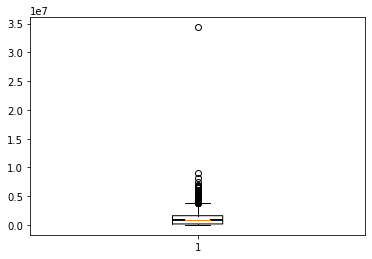

In [39]:
plt.boxplot(IRS_CA_df.Tot_Income, notch=True)

Looking at the above plot we can see for sure that there are some values in our dataset that is way beyond from other values of Tot_Income column. Lets remove it from our dataset and see how the boxplot will be for new dataset.

In [43]:
# Creating new dataframe by removing the outliers from existing dataset.

IRS_CA_df_new = IRS_CA_df[(IRS_CA_df['Tot_Income'] <= 1000000)]

In [44]:
# Lets see what the current size of the dataset after removing ouliers from data.

print("The size of the dataset after removing outliers - {}".format(*IRS_CA_df_new.shape))

The size of the dataset after removing outliers - 814


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0f1f1d400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0f1f1db20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0f1f1d070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0f1f28280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0f1f28610>],
 'means': []}

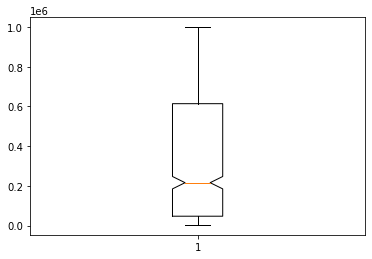

In [45]:
plt.boxplot(IRS_CA_df_new.Tot_Income, notch=True)

The above bosxplot looks more clean
But we need to understand that this is IRS dataset and we are working on total income range and that is possible if some one has way more income compare to someone who is earning less.

In [46]:
# Lets check what is the max income we have in our dataset

IRS_CA_df.Tot_Income.max()

34374979.0

In [48]:
# Now check lower income in our dataset.

IRS_CA_df.Tot_Income.min()

3136.0001

As we can see the income range in our dataset is from 3136 \$ to 34,374,979 \$. There is huge gap in between these two values.
It would be not good to remove these values and even though it looks like the outliers still we cannot remove it from our dataset.
I want to analyse this IRS data with covid vaccine data to understand hows the vaccination for lower income zipcode in California and Hows the vaccinaton for higher income zipcode.
So it would be good to leave the income column as it is without any changes and I will keep all the values.